# Convert ns-ALEX t3r files to Photon-HDF5

In [1]:
filename = 'data/Point_11_s23d9A15_70%sucrose_55%.t3r'

In [2]:
import os
try: 
    with open(filename): pass
    print('Data file found, you can proceed.')
except IOError:
    print('ATTENTION: Data file not found, please check the filename.\n'
          '           (current value "%s")' % filename)

Data file found, you can proceed.


In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
import numpy as np
import phconvert as phc
print('phconvert version: ' + phc.__version__)

phconvert version: 0+unknown


In [5]:
d, meta = phc.loader.nsalex_t3r(filename,
                                donor = 1,
                                acceptor = 0,
                                alex_period_donor = (4000, 5000),
                                alex_period_acceptor = (0, 3000),
                                excitation_wavelengths = (470e-9, 635e-9),
                                detection_wavelengths = (525e-9, 690e-9),
                                )

 - Loading 'data/Point_11_s23d9A15_70%sucrose_55%.t3r' ... 


/home/biswajit/anaconda3/lib/python3.6/site-packages/phconvert-0+unknown-py3.6.egg/phconvert/pqreader.py:511: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  ImgHdr = np.fromfile(f, dtype='int32', count=ttmode['ImgHdrSize'])
/home/biswajit/anaconda3/lib/python3.6/site-packages/phconvert-0+unknown-py3.6.egg/phconvert/pqreader.py:514: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  t3records = np.fromfile(f, dtype='uint32', count=ttmode['nRecords'])


 [DONE]



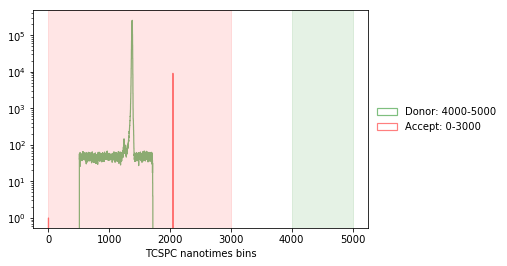

In [6]:
phc.plotter.alternation_hist(d)

In [7]:
detectors = d['photon_data']['detectors']

print("Detector    Counts")
print("--------   --------")
for det, count in zip(*np.unique(detectors, return_counts=True)):
    print("%8d   %8d" % (det, count))

Detector    Counts
--------   --------
       0       9156
       1    3405568


## Meta data

In [8]:
author = 'Biswajit'
author_affiliation = 'Leiden University'
description = 'A demonstrative pt3 data readin.'
sample_name = 'ttttt'
dye_names = 'ATTO655'
buffer_name = 'HEPES pH7 with 100 mM NaCl'

### Add meta data

In [9]:
d['description'] = description

d['sample'] = dict(
    sample_name=sample_name,
    dye_names=dye_names,
    buffer_name=buffer_name,
    num_dyes = len(dye_names.split(',')))

d['identity'] = dict(
    author=author,
    author_affiliation=author_affiliation)

In [10]:
# Remove some empty groups that may cause errors on saving
_ = meta.pop('dispcurve', None)
_ = meta.pop('imghdr', None)

In [11]:
d['user'] = {'picoquant': meta}

## Save to Photon-HDF5

In [12]:
phc.hdf5.save_photon_hdf5(d, overwrite=True)

Saving: data/Point_11_s23d9A15_70%sucrose_55%.hdf5


In [13]:
# del d

## Load Photon-HDF5

In [14]:
from pprint import pprint

In [15]:
filename = d['_data_file'].filename

In [16]:
h5data = phc.hdf5.load_photon_hdf5(filename)

In [17]:
phc.hdf5.dict_from_group(h5data.identity)

{'author': 'Biswajit',
 'author_affiliation': 'Leiden University',
 'creation_time': '2017-08-29 10:16:11',
 'filename': 'Point_11_s23d9A15_70%sucrose_55%.hdf5',
 'filename_full': '/home/biswajit/Research/Experimental/Analysis/Histogram_simulation/Python_simulation_Biswajit/photon_simulation/phconvert-outcome/notebook-Biswajit/data/Point_11_s23d9A15_70%sucrose_55%.hdf5',
 'format_name': 'Photon-HDF5',
 'format_url': 'http://photon-hdf5.org/',
 'format_version': '0.4',
 'software': 'phconvert',
 'software_version': '0+unknown'}

In [18]:
phc.hdf5.dict_from_group(h5data.setup)

{'detection_wavelengths': array([  5.25000000e-07,   6.90000000e-07]),
 'excitation_cw': array([0, 0], dtype=uint8),
 'excitation_wavelengths': array([  4.70000000e-07,   6.35000000e-07]),
 'lifetime': 1,
 'modulated_excitation': 1,
 'num_pixels': 2,
 'num_polarization_ch': 1,
 'num_spectral_ch': 2,
 'num_split_ch': 1,
 'num_spots': 1}

In [19]:
pprint(phc.hdf5.dict_from_group(h5data.photon_data))

{'detectors': array([0, 1, 0, ..., 1, 1, 1], dtype=uint8),
 'measurement_specs': {'alex_excitation_period1': [4000, 5000],
                       'alex_excitation_period2': [0, 3000],
                       'detectors_specs': {'spectral_ch1': array([1], dtype=uint8),
                                           'spectral_ch2': array([0], dtype=uint8)},
                       'laser_repetition_rate': 4696064.0,
                       'measurement_type': 'smFRET-nsALEX'},
 'nanotimes': array([   3, 1376, 2048, ..., 1377, 1380, 1373], dtype=uint16),
 'nanotimes_specs': {'tcspc_num_bins': 4096,
                     'tcspc_range': 1.6277873271519638e-07,
                     'tcspc_unit': 3.974090154179599e-11},
 'timestamps': array([    65540,    120850,    196607, ..., 600064325, 600064335,
       600064417]),
 'timestamps_specs': {'timestamps_unit': 1e-07}}


In [20]:
h5data._v_file.close()